# Practical 11

## Aim : Apply SVD on image

In [1]:
# Import module
# Import PIL module
from PIL import Image
# open method used to open different extension image file
im = Image.open(r"D:\Sem 4\AML\scenery3.png")
im.show()

Text(0.5, 1.0, 'Orignal RGB Image')

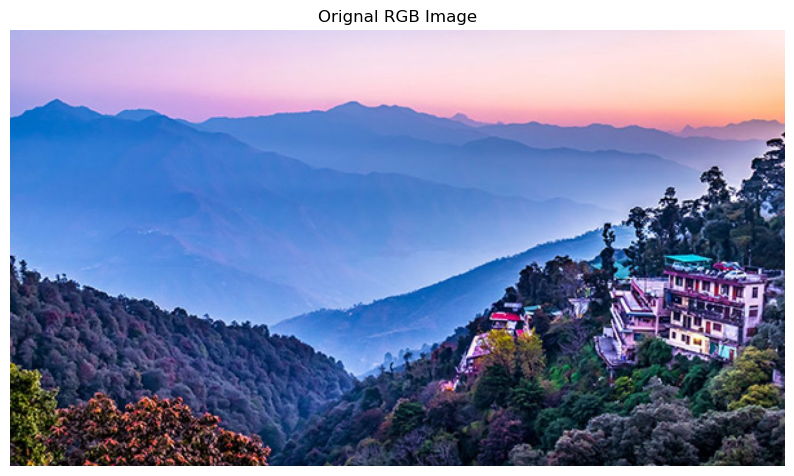

In [2]:
import requests
import cv2
import numpy as np
import matplotlib.pyplot as plt
from numpy.linalg import svd

img = cv2.imread(r"D:\Sem 4\AML\scenery3.png")
plt.figure(figsize = (10,10))
plt.axis("off")  # to hide axis use "off"
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
plt.title('Orignal RGB Image')

In [4]:
#calculate the svd
u,s,v = np.linalg.svd(img, full_matrices = False)
#ispect shape of the matrices
print(f'u.shape:{u.shape}, s.shape:{s.shape}, v.shape:{v.shape}')

u.shape:(720, 1280, 3), s.shape:(720, 3), v.shape:(720, 3, 3)


Text(0.5, 1.0, 'Gray Image')

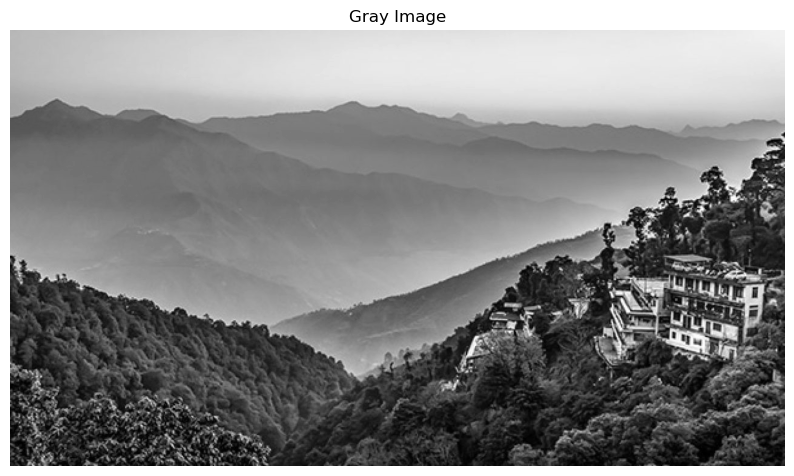

In [6]:
gray_image = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
plt.figure(figsize = (10,10))
plt.axis("off")  # to hide axis use "off"
plt.imshow(gray_image, cmap = "gray")
plt.title('Gray Image')

In [7]:
gray_image = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
#calculate the svd
u,s,v = np.linalg.svd(gray_image, full_matrices = False)
#ispect shape of the matrices
print(f'u.shape:{u.shape}, s.shape:{s.shape}, v.shape:{v.shape}')

u.shape:(720, 720), s.shape:(720,), v.shape:(720, 1280)


In [ ]:
# The above output shape indicate that there are 720 linrearly independent dimensions

Text(0.5, 1.0, 'Actual Image')

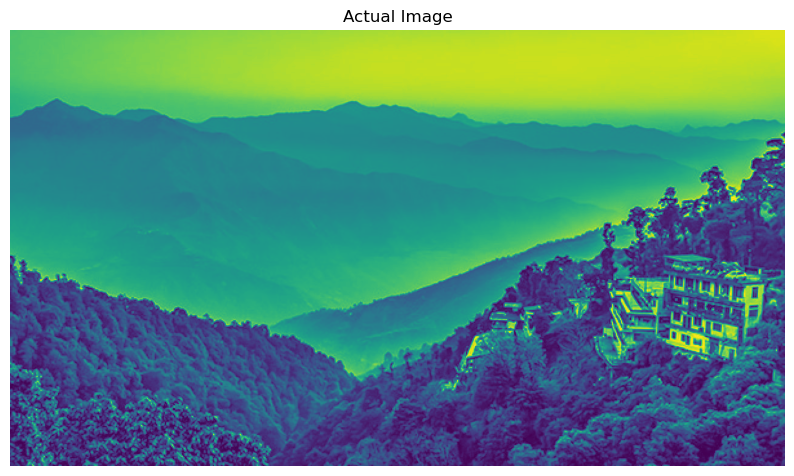

In [9]:
plt.figure(figsize = (10,10))
orig_rank = u[:, :] @ np.diag(s[:]) @ v[:, :]
plt.axis("off")  # to hide axis use "off"
plt.imshow(orig_rank)
plt.title('Actual Image')

Variance explained by top 20 singular values:
[9.29603e-01 1.31580e-02 1.00140e-02 5.86800e-03 3.23900e-03 2.81800e-03
 2.56900e-03 2.03300e-03 1.88900e-03 1.55100e-03 1.41000e-03 1.26800e-03
 1.15900e-03 9.39000e-04 8.77000e-04 8.28000e-04 7.91000e-04 7.63000e-04
 6.65000e-04 6.18000e-04]


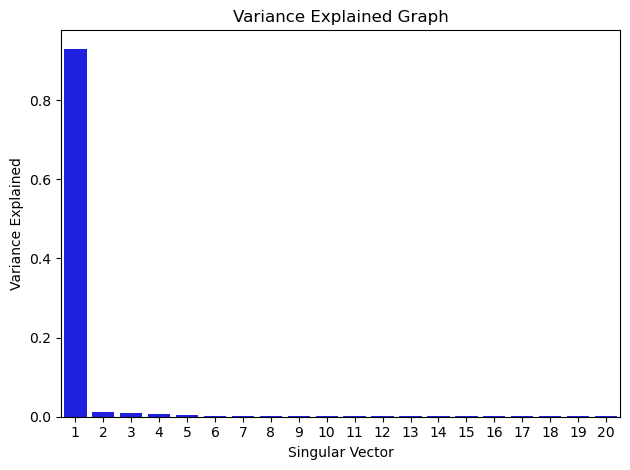

In [12]:
import seaborn as sns
var_explained = np.round(s**2/np.sum(s**2), decimals = 6)
print (f'Variance explained by top 20 singular values:\n{var_explained[0:20]}')

sns.barplot(x = list(range(1,21)), y = var_explained[0:20] , color = 'blue')
plt.title('Variance Explained Graph')
plt.xlabel('Singular Vector')
plt.ylabel('Variance Explained')
plt.tight_layout()
plt.show()

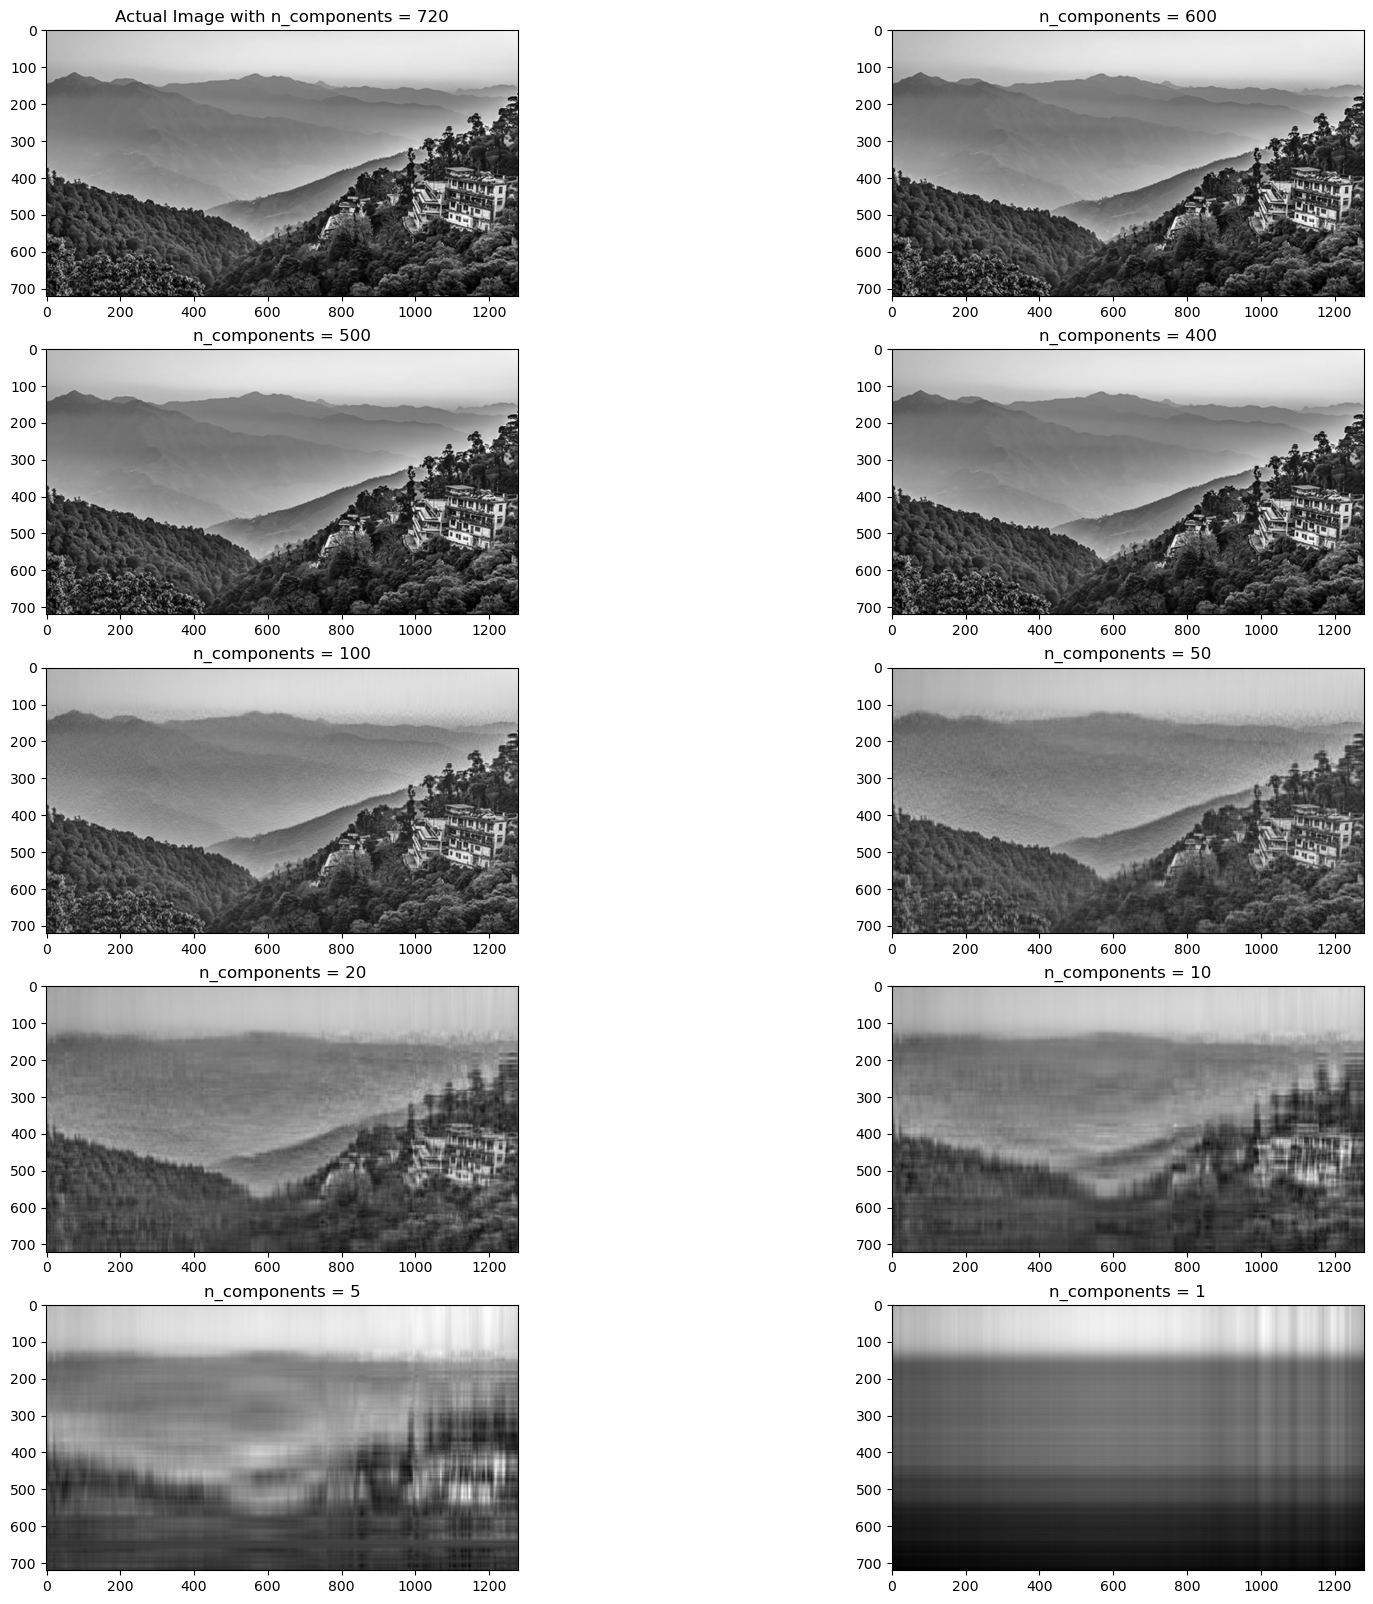

In [14]:
comps = [720, 600, 500, 400, 100, 50, 20, 10, 5, 1]
plt.figure(figsize = (20,20))
for i in range(len(comps)):
    low_rank = u[:, :comps[i]] @ np.diag(s[: comps[i]]) @ v[:comps[i]]
    if(i == 0):
        plt.subplot(5,2,i+1)
        plt.imshow(low_rank, cmap = "gray"),
        plt.title(f'Actual Image with n_components = {comps[i]}')
    else:
        plt.subplot(5,2,i+1)
        plt.imshow(low_rank, cmap = "gray"),
        plt.title(f'n_components = {comps[i]}')